In [2]:
import pandas as pd
import seaborn as sns

In [22]:
tsa = pd.read_csv("tsa_claims1.csv")

/tmp/ipykernel_269/1999626313.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  tsa = pd.read_csv("tsa_claims1.csv")


In [119]:
tsa

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,350.00,Approved,350.00,Approve in Full
1,0202445M,4-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,278.88,Settled,227.92,Settle
2,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.00,Approve in Full
3,2005032379513,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,84.79,Approved,84.79,Approve in Full
4,2005032479636,18-Feb-02,2/17/2005 0:00,CAK,Akron-Canton Regional,Air Tran Airlines(do not use),Passenger Property Loss,Checked Baggage,Other,459.01,Settled,227.00,Settle
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94843,2010010567195,31-Dec-09,12/14/2009 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checked Baggage,Luggage (all types including footlockers),175.90,Denied,0.00,Deny
94844,2010010667196,31-Dec-09,12/17/2009 7:55,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checked Baggage,Cell Phones (smartphone type-blackberry; iphon...,695.00,Denied,0.00,Deny
94845,2010010667198,31-Dec-09,12/15/2009 0:00,SMF,Sacramento International Airport,Southwest Airlines,Passenger Property Loss,Checked Baggage,Locks,25.50,Denied,0.00,Deny
94846,2010010667199,31-Dec-09,12/16/2009 10:00,ENV,Wendover Municipal Airport,Xtra Airways,Passenger Property Loss,Checked Baggage,Locks,20.00,Denied,0.00,Deny


In [30]:
tsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94848 entries, 0 to 94847
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Claim Number   94848 non-null  object 
 1   Date Received  94848 non-null  object 
 2   Incident Date  94848 non-null  object 
 3   Airport Code   94848 non-null  object 
 4   Airport Name   94848 non-null  object 
 5   Airline Name   94848 non-null  object 
 6   Claim Type     94848 non-null  object 
 7   Claim Site     94848 non-null  object 
 8   Item           94848 non-null  object 
 9   Claim Amount   94848 non-null  float64
 10  Status         94848 non-null  object 
 11  Close Amount   94848 non-null  float64
 12  Disposition    94848 non-null  object 
dtypes: float64(2), object(11)
memory usage: 9.4+ MB


## What is the most common type of insurance claim?

In [38]:
tsa['Claim Type'].value_counts()

Claim Type
Passenger Property Loss    60265
Property Damage            33730
Passenger Theft              331
Employee Loss (MPCECA)       308
Personal Injury              208
Motor Vehicle                  6
Name: count, dtype: int64

Passenger Proptery Loss is the most common claim type.

## Which claim site within the airport are claims most commonly filed for?

In [41]:
tsa['Claim Site'].value_counts()

Claim Site
Checked Baggage    80553
Checkpoint         14013
Other                280
Motor Vehicle          2
Name: count, dtype: int64

Checked Baggage Site is the most common claim site.

## What type of claim is made most at each claim site?

In [95]:
claimtsa = tsa.groupby(['Claim Site', 'Claim Type']).size().reset_index(name='count')

In [109]:
claimtsa

,Claim Site,Claim Type,count
0,Checked Baggage,Employee Loss (MPCECA),275
1,Checked Baggage,Motor Vehicle,4
2,Checked Baggage,Passenger Property Loss,53364
3,Checked Baggage,Passenger Theft,294
4,Checked Baggage,Personal Injury,89
5,Checked Baggage,Property Damage,26527
6,Checkpoint,Employee Loss (MPCECA),32
7,Checkpoint,Motor Vehicle,1
8,Checkpoint,Passenger Property Loss,6740
9,Checkpoint,Passenger Theft,36


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


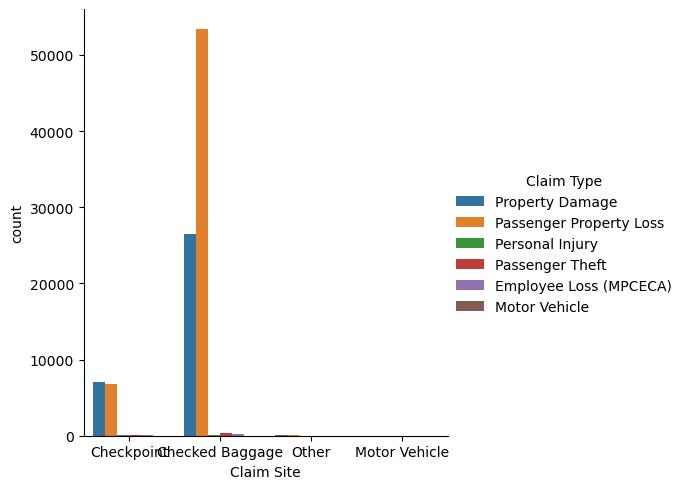

In [79]:
sns.catplot(data=tsa, kind='count', x='Claim Site', hue="Claim Type")

## Claim Sites Highest

Checked Baggage: Passenger Property Loss \
Checkpoint: Property Damage \
Motor Vehicle: Passenger Property Loss \
Other: Passenger Property Loss

## What is the typical claim amount?

In [185]:
mode_value = tsa['Claim Amount'].mode()

# Display the mode
print("Mode of the column:", mode_value)

Mode of the column: 0    100.0
Name: Claim Amount, dtype: float64


The typical claim amount is the mean of the claim amounts

The typical claim amount is 0 and 100

## What is the overall claim approval rate for the entire U.S.?

In [148]:
tsa['Status'].value_counts(normalize=True)

Status
Denied                            0.561667
Approved                          0.244254
Settled                           0.194005
Canceled                          0.000063
Pending response from claimant    0.000011
Name: proportion, dtype: float64

I counted each value within the "Status" column, allowing me to convert the count into a percentage of the total.

There is a 24.4% approval rate